In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import pandas as pd

In [2]:
import sqlalchemy
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

In [3]:
database_path="hawaii.sqlite"
engine=create_engine(f"sqlite:///{database_path}")
conn=engine.connect()
inspector=inspect(engine)

In [4]:
#I could not figure out the name of the tables of the database.
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print("Column: %s" % column['name'])
        print(table_name)

Column: id
measurement
Column: station
measurement
Column: date
measurement
Column: prcp
measurement
Column: tobs
measurement
Column: id
station
Column: station
station
Column: name
station
Column: latitude
station
Column: longitude
station
Column: elevation
station


In [5]:
Base=automap_base()
Base.prepare(engine,reflect=True)

In [6]:
Base.classes.keys()

['measurement', 'station']

In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
datax=pd.read_sql("SELECT * FROM measurement",conn)
data = pd.read_sql("SELECT * FROM station", conn)

In [79]:
datax.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [10]:
datax.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
session=Session(engine)

In [59]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date>="2016-08-23").all()

In [60]:
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [61]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(results,columns=["Date","Precipitations"])
dff=df.sort_values(by=["Date"],ascending=True)
dff=dff.set_index(["Date"])

In [71]:
dff.head(5)

,Precipitations
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


In [72]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dff.describe()

,Precipitations
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


[]

<Figure size 864x720 with 0 Axes>

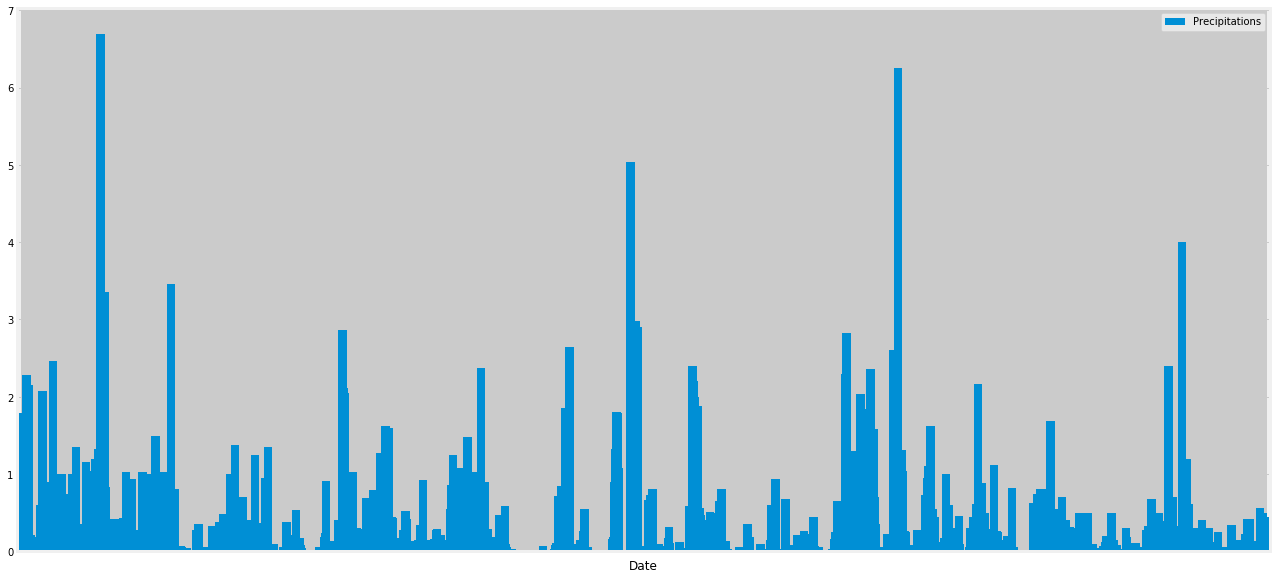

In [78]:
# Use Pandas Plotting with Matplotlib to plot the data
ax= plt.figure(figsize=(12,10))
ax=dff.plot.bar(width=15)
ax.set_xticklabels([])

In [36]:
## Design a query to show how many stations are available in this dataset?
number_Stations=session.query(func.count(Station.id)).all()
print(number_Stations)

[(9,)]


In [56]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity_stations=session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()


In [57]:
activity_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
low_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
low_temp

[(54.0)]

In [86]:
avg_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
avg_temp

[(71.66378066378067)]

In [87]:
high_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station=="USC00519281").all()
high_temp

[(85.0)]

In [88]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures=session.query(Measurement.date,Measurement.tobs).\
        filter(Measurement.station=="USC00519281",Measurement.date>="2016-08-23").all()
temperatures

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-